In [ ]:
# https://coolors.co/fc9f5b-fbd1a2-ece4b7-7dcfb6-33ca7f

# Data acquisition and alignment

## Load Disease incidence

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
#loading csv
df = pd.read_csv("/content/filtered_data_PAHO_1770330543785.csv")


In [30]:
df

,adm_0_name,adm_1_name,adm_2_name,full_name,ISO_A0,FAO_GAUL_code,RNE_iso_code,IBGE_code,calendar_start_date,calendar_end_date,Year,dengue_total,case_definition_standardised,S_res,T_res,UUID,region
0,BRAZIL,ALAGOAS,NaN,"BRAZIL, ALAGOAS",BRA,666,BR-AL,NaN,1998-10-01,1998-10-31,1998,166,Total,Admin1,Month,TYCHO-ALL-19242017-SV_DF01-00,PAHO
1,BRAZIL,AMAPA,NaN,"BRAZIL, AMAPA",BRA,667,BR-AP,NaN,1998-09-01,1998-09-30,1998,161,Total,Admin1,Month,TYCHO-ALL-19242017-SV_DF01-00,PAHO
2,BRAZIL,ALAGOAS,NaN,"BRAZIL, ALAGOAS",BRA,666,BR-AL,NaN,1996-06-01,1996-06-30,1996,136,Total,Admin1,Month,TYCHO-ALL-19242017-SV_DF01-00,PAHO
3,BRAZIL,ALAGOAS,NaN,"BRAZIL, ALAGOAS",BRA,666,BR-AL,NaN,1996-07-01,1996-07-31,1996,39,Total,Admin1,Month,TYCHO-ALL-19242017-SV_DF01-00,PAHO
4,BRAZIL,ALAGOAS,NaN,"BRAZIL, ALAGOAS",BRA,666,BR-AL,NaN,1996-08-01,1996-08-31,1996,23,Total,Admin1,Month,TYCHO-ALL-19242017-SV_DF01-00,PAHO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19443,MEXICO,GUANAJUATO,NaN,"MEXICO, GUANAJUATO",MEX,1006352,MX-GUA,NaN,2018-11-11,2018-11-17,2018,4,Total,Admin1,Week,WHOPAHO-MEX-20172022-SV_ALL01-00,PAHO
19444,MEXICO,GUERRERO,NaN,"MEXICO, GUERRERO",MEX,1006353,MX-GRO,NaN,2018-11-11,2018-11-17,2018,46,Total,Admin1,Week,WHOPAHO-MEX-20172022-SV_ALL01-00,PAHO
19445,MEXICO,NAYARIT,NaN,"MEXICO, NAYARIT",MEX,1006368,MX-NAY,NaN,2018-11-11,2018-11-17,2018,128,Total,Admin1,Week,WHOPAHO-MEX-20172022-SV_ALL01-00,PAHO
19446,MEXICO,MEXICO,NaN,"MEXICO, MEXICO",MEX,1006355,MX-MEX,NaN,2018-11-11,2018-11-17,2018,8,Total,Admin1,Week,WHOPAHO-MEX-20172022-SV_ALL01-00,PAHO


In [17]:
df.columns

Index(['adm_0_name', 'adm_1_name', 'adm_2_name', 'full_name', 'ISO_A0',
       'FAO_GAUL_code', 'RNE_iso_code', 'IBGE_code', 'calendar_start_date',
       'calendar_end_date', 'Year', 'dengue_total',
       'case_definition_standardised', 'S_res', 'T_res', 'UUID', 'region'],
      dtype='object')

In [55]:
#loading csv just mexico
df2 = pd.read_csv("/content/filtered_data_PAHO_1770331229823.csv")
df2["T_res"].unique()

array(['Year', 'Week'], dtype=object)

In [62]:
#filter countries

mexico = df[
    (df["adm_0_name"] == "MEXICO")&
    (df["T_res"] == "Week") &
    (df["S_res"] == "Admin1")
]
#parse dates
mexico["Date"] = pd.to_datetime(mexico["calendar_start_date"])

brazil = df[
    (df["adm_0_name"] == "BRAZIL")&
    (df["T_res"] == "Month") &
    (df["S_res"] == "Admin1")
]
#parse dates
brazil["Date"] = pd.to_datetime(brazil["calendar_start_date"])

len(brazil)

/tmp/ipython-input-1982196512.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mexico["Date"] = pd.to_datetime(mexico["calendar_start_date"])
/tmp/ipython-input-1982196512.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brazil["Date"] = pd.to_datetime(brazil["calendar_start_date"])


719

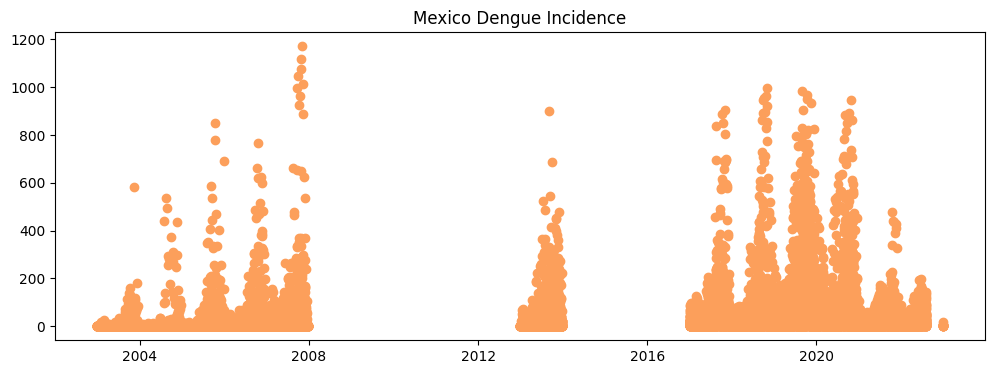

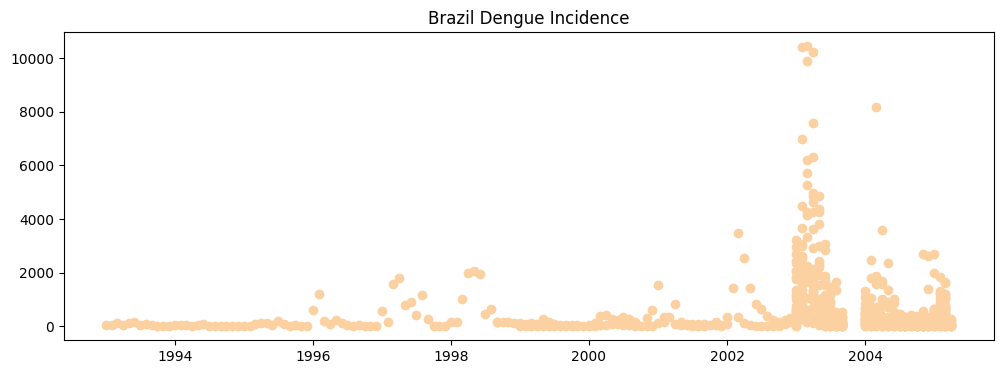

In [61]:
plt.figure(figsize=(12,4))
plt.scatter(mexico["Date"], mexico["dengue_total"], color = "#FC9F5B")
plt.title("Mexico Dengue Incidence")
plt.show()

plt.figure(figsize=(12,4))
plt.scatter(brazil["Date"], brazil["dengue_total"], color = "#FBD1A2")
plt.title("Brazil Dengue Incidence")
plt.show()



so theres a problem mexico isnt continuous.

<Axes: >

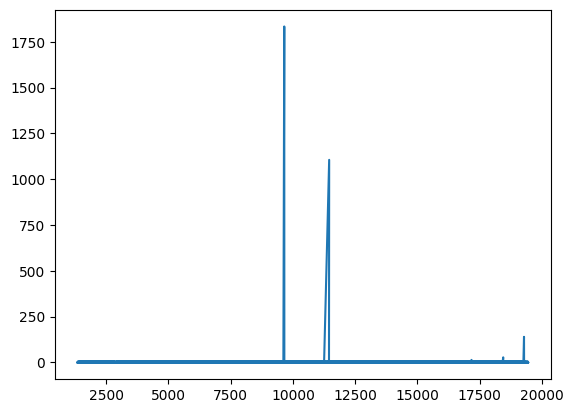

In [66]:
mexico = mexico.sort_values("Date")

mexico["gap"] = mexico["Date"].diff().dt.days

#weekly data should have a gap of 7 days. anything greater will break
mexico["gap"].plot()
#spikes are where gaps exist
# the first cluster seems to be the longest so lets  take that



In [71]:
#identify breaks
mexico["break"] = mexico["gap"] > 14

#assign segment ids
mexico["segment"] = mexico["break"].cumsum()

#find the lognest segment
segment_sizes = mexico.groupby("segment").size()
longest_segment = segment_sizes.idxmax()

#filter dataset
mexico_clean = mexico[
    mexico["segment"] == longest_segment
]
len(mexico_clean)
#8315 is a larrge number because multiple states arent aggregated but produce rows again and again

8315

mexico number of weeks: 261


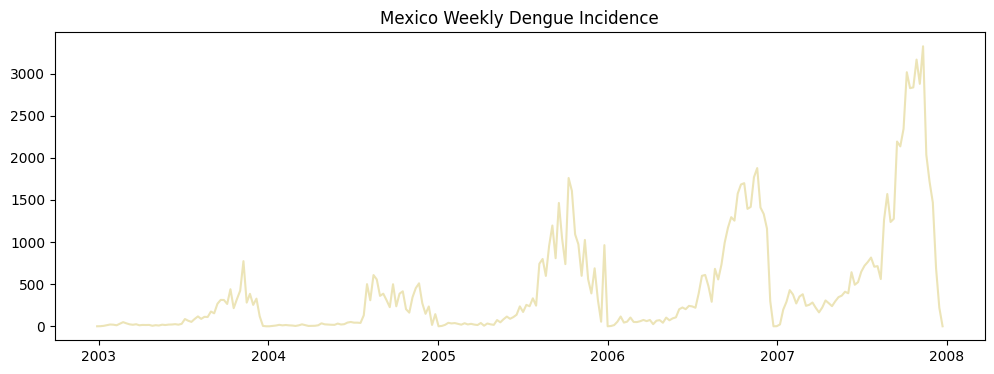

brazil number of months: 145


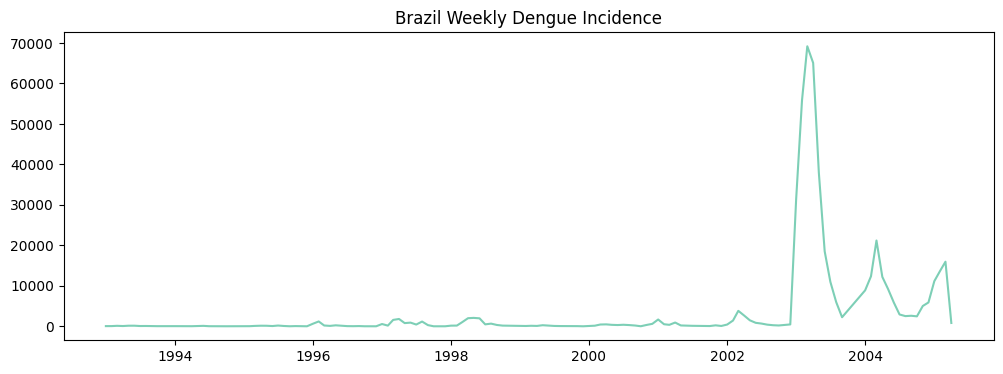

In [82]:
#national aggregation
mexico_nat = (
    mexico_clean
    .groupby("Date")["dengue_total"]
    .sum()
    .reset_index()
)
print("mexico number of weeks:", len(mexico_nat))

#261 weeks around 5 years

plt.figure(figsize=(12,4))
plt.plot(mexico_nat["Date"],
         mexico_nat["dengue_total"], color = "#ECE4B7")

plt.title("Mexico Weekly Dengue Incidence")
plt.show()

#national aggregation
brazil_nat = (
    brazil
    .groupby("Date")["dengue_total"]
    .sum()
    .reset_index()
)
print("brazil number of months:", len(brazil_nat))

#261 weeks around 5 years

plt.figure(figsize=(12,4))
plt.plot(brazil_nat["Date"],
         brazil_nat["dengue_total"], color = "#7DCFB6")
plt.title("Brazil Weekly Dengue Incidence")
plt.show()




## Load Climate Data

In [133]:
print(brazil_nat["Date"][0])
print(brazil_nat["Date"][144])

1993-01-01 00:00:00
2005-04-01 00:00:00


preprocessing temperature

        Date        T2M
0 2002-12-29  14.623643
1 2002-12-30  14.806500
2 2002-12-31  11.932286
3 2003-01-01  13.694286
4 2003-01-02  10.754500
           Date        T2M
1816 2007-12-19  16.679929
1817 2007-12-20  16.412929
1818 2007-12-21  16.590429
1819 2007-12-22  15.333643
1820 2007-12-23  10.913714
1821


/tmp/ipython-input-3609180866.py:125: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  mexico_temp["T2M"].replace(-999, pd.NA, inplace=True)
/tmp/ipython-input-3609180866.py:126: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

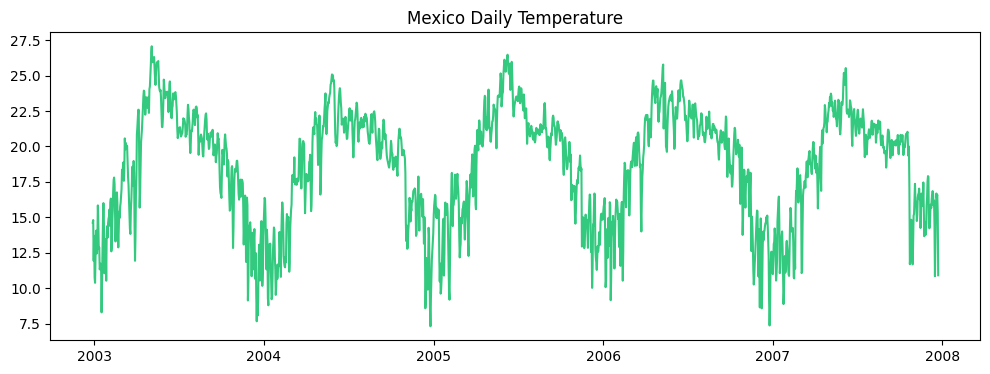

In [105]:
#skip header rows
df1 = pd.read_csv("/content/POWER_Regional_Daily_20021229_20031229.csv", skiprows=9)

#convert year + DOY to date
df1["Date"] = pd.to_datetime(
    df1["YEAR"].astype(str) + "-" + df1["DOY"].astype(str),
    format="%Y-%j"
)

#spatial averaging
#because each day has multiple lat and lon
df1_daily = (
    df1.groupby("Date")["T2M"]
    .mean()
    .reset_index()
)


#date x temp. you get one row per day

#skip header rows
df2 = pd.read_csv("/content/POWER_Regional_Daily_20031229_20041228.csv", skiprows=9)

#convert year + DOY to date
df2["Date"] = pd.to_datetime(
    df2["YEAR"].astype(str) + "-" + df2["DOY"].astype(str),
    format="%Y-%j"
)

#spatial averaging
#because each day has multiple lat and lon
df2_daily = (
    df2.groupby("Date")["T2M"]
    .mean()
    .reset_index()
)


#date x temp. you get one row per day


#skip header rows
df3 = pd.read_csv("/content/POWER_Regional_Daily_20041228_20051228.csv", skiprows=9)

#convert year + DOY to date
df3["Date"] = pd.to_datetime(
    df3["YEAR"].astype(str) + "-" + df3["DOY"].astype(str),
    format="%Y-%j"
)

#spatial averaging
#because each day has multiple lat and lon
df3_daily = (
    df3.groupby("Date")["T2M"]
    .mean()
    .reset_index()
)


#date x temp. you get one row per day


#skip header rows
df4 = pd.read_csv("/content/POWER_Regional_Daily_20051228_20061228.csv", skiprows=9)

#convert year + DOY to date
df4["Date"] = pd.to_datetime(
    df4["YEAR"].astype(str) + "-" + df4["DOY"].astype(str),
    format="%Y-%j"
)

#spatial averaging
#because each day has multiple lat and lon
df4_daily = (
    df4.groupby("Date")["T2M"]
    .mean()
    .reset_index()
)


#date x temp. you get one row per day


#skip header rows
df5 = pd.read_csv("/content/POWER_Regional_Daily_20061228_20071223.csv", skiprows=9)

#convert year + DOY to date
df5["Date"] = pd.to_datetime(
    df5["YEAR"].astype(str) + "-" + df5["DOY"].astype(str),
    format="%Y-%j"
)

#spatial averaging
#because each day has multiple lat and lon
df5_daily = (
    df5.groupby("Date")["T2M"]
    .mean()
    .reset_index()
)


#date x temp. you get one row per day

mexico_temp = pd.concat([
    df1_daily,
    df2_daily,
    df3_daily,
    df4_daily,
    df5_daily
])

#remove overlapping dates
mexico_temp = mexico_temp.drop_duplicates("Date")

#sort chronologically
mexico_temp = mexico_temp.sort_values("Date")
mexico_temp = mexico_temp.reset_index(drop=True)

print(mexico_temp.head())
print(mexico_temp.tail())
print(len(mexico_temp))


#since nasa encodes the missing data as -999
mexico_temp["T2M"].replace(-999, pd.NA, inplace=True)
mexico_temp["T2M"].interpolate(inplace=True)



plt.figure(figsize=(12,4))
plt.plot(mexico_temp["Date"], mexico_temp["T2M"], color = '#33CA7F')
plt.title("Mexico Daily Temperature")
plt.show()



preprocessing humidity

        Date       RH2M
0 2002-12-29  70.761357
1 2002-12-30  63.562214
2 2002-12-31  45.126786
3 2003-01-01  44.366214
4 2003-01-02  48.118929
           Date       RH2M
1816 2007-12-19  51.829357
1817 2007-12-20  43.315786
1818 2007-12-21  45.592214
1819 2007-12-22  42.551143
1820 2007-12-23  46.812143
1821


/tmp/ipython-input-1101823976.py:125: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  mexico_humidity["RH2M"].replace(-999, pd.NA, inplace=True)
/tmp/ipython-input-1101823976.py:126: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

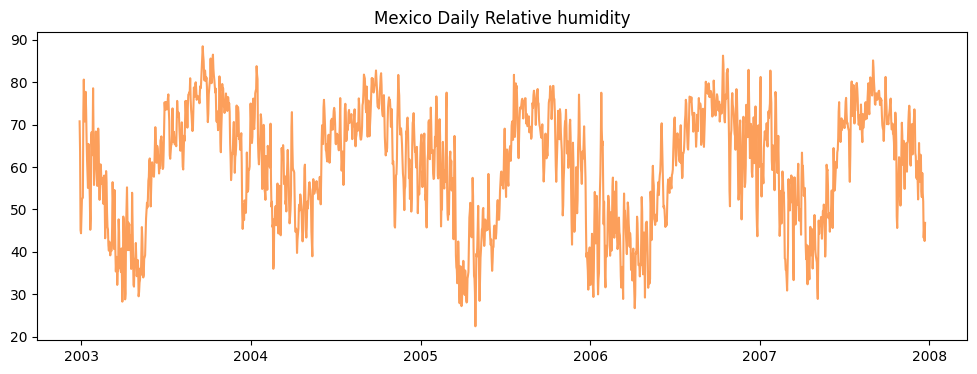

In [107]:
#skip header rows
df1 = pd.read_csv("/content/humidity/POWER_Regional_Daily_20021229_20031229.csv", skiprows=9)

#convert year + DOY to date
df1["Date"] = pd.to_datetime(
    df1["YEAR"].astype(str) + "-" + df1["DOY"].astype(str),
    format="%Y-%j"
)

#spatial averaging
#because each day has multiple lat and lon
df1_daily = (
    df1.groupby("Date")["RH2M"]
    .mean()
    .reset_index()
)


#date x temp. you get one row per day

#skip header rows
df2 = pd.read_csv("/content/humidity/POWER_Regional_Daily_20031229_20041228.csv", skiprows=9)

#convert year + DOY to date
df2["Date"] = pd.to_datetime(
    df2["YEAR"].astype(str) + "-" + df2["DOY"].astype(str),
    format="%Y-%j"
)

#spatial averaging
#because each day has multiple lat and lon
df2_daily = (
    df2.groupby("Date")["RH2M"]
    .mean()
    .reset_index()
)


#date x temp. you get one row per day


#skip header rows
df3 = pd.read_csv("/content/humidity/POWER_Regional_Daily_20041228_20051228.csv", skiprows=9)

#convert year + DOY to date
df3["Date"] = pd.to_datetime(
    df3["YEAR"].astype(str) + "-" + df3["DOY"].astype(str),
    format="%Y-%j"
)

#spatial averaging
#because each day has multiple lat and lon
df3_daily = (
    df3.groupby("Date")["RH2M"]
    .mean()
    .reset_index()
)


#date x temp. you get one row per day


#skip header rows
df4 = pd.read_csv("/content/humidity/POWER_Regional_Daily_20051228_20061228.csv", skiprows=9)

#convert year + DOY to date
df4["Date"] = pd.to_datetime(
    df4["YEAR"].astype(str) + "-" + df4["DOY"].astype(str),
    format="%Y-%j"
)

#spatial averaging
#because each day has multiple lat and lon
df4_daily = (
    df4.groupby("Date")["RH2M"]
    .mean()
    .reset_index()
)


#date x temp. you get one row per day


#skip header rows
df5 = pd.read_csv("/content/humidity/POWER_Regional_Daily_20061228_20071223.csv", skiprows=9)

#convert year + DOY to date
df5["Date"] = pd.to_datetime(
    df5["YEAR"].astype(str) + "-" + df5["DOY"].astype(str),
    format="%Y-%j"
)

#spatial averaging
#because each day has multiple lat and lon
df5_daily = (
    df5.groupby("Date")["RH2M"]
    .mean()
    .reset_index()
)


#date x temp. you get one row per day

mexico_humidity = pd.concat([
    df1_daily,
    df2_daily,
    df3_daily,
    df4_daily,
    df5_daily
])

#remove overlapping dates
mexico_humidity = mexico_humidity.drop_duplicates("Date")

#sort chronologically
mexico_humidity = mexico_humidity.sort_values("Date")
mexico_humidity = mexico_humidity.reset_index(drop=True)

print(mexico_humidity.head())
print(mexico_humidity.tail())
print(len(mexico_humidity))


#since nasa encodes the missing data as -999
mexico_humidity["RH2M"].replace(-999, pd.NA, inplace=True)
mexico_humidity["RH2M"].interpolate(inplace=True)



plt.figure(figsize=(12,4))
plt.plot(mexico_humidity["Date"], mexico_humidity["RH2M"], color = '#FC9F5B')
plt.title("Mexico Daily Relative humidity")
plt.show()



        Date  PRECTOTCORR
0 2002-12-29     0.532786
1 2002-12-30     0.001286
2 2002-12-31     0.002286
3 2003-01-01     0.000714
4 2003-01-02     0.000500
           Date  PRECTOTCORR
1816 2007-12-19     0.016429
1817 2007-12-20     0.000000
1818 2007-12-21     0.000000
1819 2007-12-22     0.000000
1820 2007-12-23     0.152571
1821


/tmp/ipython-input-3398592315.py:125: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  mexico_prec["PRECTOTCORR"].replace(-999, pd.NA, inplace=True)
/tmp/ipython-input-3398592315.py:126: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpla

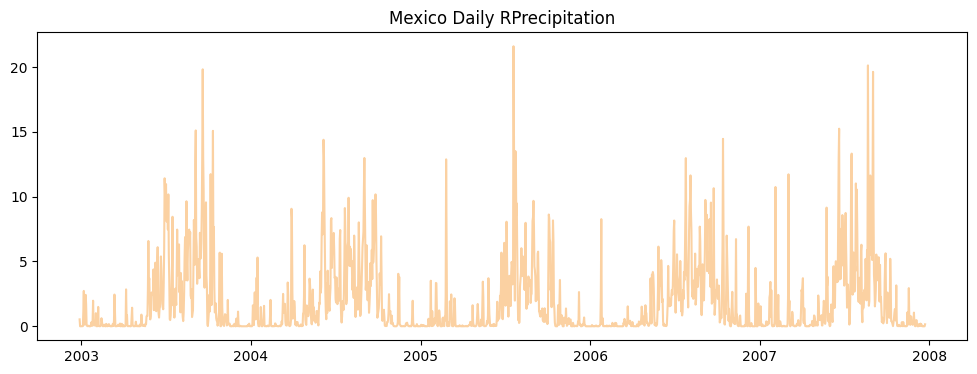

In [109]:
#skip header rows
df1 = pd.read_csv("/content/precipitation/POWER_Regional_Daily_20021229_20031229.csv", skiprows=9)

#convert year + DOY to date
df1["Date"] = pd.to_datetime(
    df1["YEAR"].astype(str) + "-" + df1["DOY"].astype(str),
    format="%Y-%j"
)

#spatial averaging
#because each day has multiple lat and lon
df1_daily = (
    df1.groupby("Date")["PRECTOTCORR"]
    .mean()
    .reset_index()
)


#date x temp. you get one row per day

#skip header rows
df2 = pd.read_csv("/content/precipitation/POWER_Regional_Daily_20031229_20041228.csv", skiprows=9)

#convert year + DOY to date
df2["Date"] = pd.to_datetime(
    df2["YEAR"].astype(str) + "-" + df2["DOY"].astype(str),
    format="%Y-%j"
)

#spatial averaging
#because each day has multiple lat and lon
df2_daily = (
    df2.groupby("Date")["PRECTOTCORR"]
    .mean()
    .reset_index()
)


#date x temp. you get one row per day


#skip header rows
df3 = pd.read_csv("/content/precipitation/POWER_Regional_Daily_20041228_20051228.csv", skiprows=9)

#convert year + DOY to date
df3["Date"] = pd.to_datetime(
    df3["YEAR"].astype(str) + "-" + df3["DOY"].astype(str),
    format="%Y-%j"
)

#spatial averaging
#because each day has multiple lat and lon
df3_daily = (
    df3.groupby("Date")["PRECTOTCORR"]
    .mean()
    .reset_index()
)


#date x temp. you get one row per day


#skip header rows
df4 = pd.read_csv("/content/precipitation/POWER_Regional_Daily_20051228_20061228.csv", skiprows=9)

#convert year + DOY to date
df4["Date"] = pd.to_datetime(
    df4["YEAR"].astype(str) + "-" + df4["DOY"].astype(str),
    format="%Y-%j"
)

#spatial averaging
#because each day has multiple lat and lon
df4_daily = (
    df4.groupby("Date")["PRECTOTCORR"]
    .mean()
    .reset_index()
)


#date x temp. you get one row per day


#skip header rows
df5 = pd.read_csv("/content/precipitation/POWER_Regional_Daily_20061228_20071223.csv", skiprows=9)

#convert year + DOY to date
df5["Date"] = pd.to_datetime(
    df5["YEAR"].astype(str) + "-" + df5["DOY"].astype(str),
    format="%Y-%j"
)

#spatial averaging
#because each day has multiple lat and lon
df5_daily = (
    df5.groupby("Date")["PRECTOTCORR"]
    .mean()
    .reset_index()
)


#date x temp. you get one row per day

mexico_prec = pd.concat([
    df1_daily,
    df2_daily,
    df3_daily,
    df4_daily,
    df5_daily
])

#remove overlapping dates
mexico_prec = mexico_prec.drop_duplicates("Date")

#sort chronologically
mexico_prec = mexico_prec.sort_values("Date")
mexico_prec = mexico_prec.reset_index(drop=True)

print(mexico_prec.head())
print(mexico_prec.tail())
print(len(mexico_prec))


#since nasa encodes the missing data as -999
mexico_prec["PRECTOTCORR"].replace(-999, pd.NA, inplace=True)
mexico_prec["PRECTOTCORR"].interpolate(inplace=True)



plt.figure(figsize=(12,4))
plt.plot(mexico_prec["Date"], mexico_prec["PRECTOTCORR"], color = '#FBD1A2')
plt.title("Mexico Daily RPrecipitation")
plt.show()



In [112]:
#merge all climate variables
mexico_climate = (
    mexico_temp
    .merge(mexico_prec, on="Date")
    .merge(mexico_humidity, on="Date")
)
#renaming columns
mexico_climate.columns = [
    "Date",
    "Temp",
    "Rain",
    "Humidity"
]

#weekly aggregation. data is daily
mexico_weekly = (
    mexico_climate
    .set_index("Date")
    .resample("W")
    .agg({
        "Temp": "mean",
        "Rain": "sum",
        "Humidity": "mean"
    })
    .reset_index()
)

mexico_weekly.head(6)

,Date,Temp,Rain,Humidity
0,2002-12-29,14.623643,0.532786,70.761357
1,2003-01-05,12.531194,0.013500,51.275153
2,2003-01-12,13.744255,8.793357,74.309378
3,2003-01-19,11.065092,0.243643,60.365786
4,2003-01-26,13.454888,1.014214,58.606122
5,2003-02-02,13.813316,3.542929,65.013510


brazil

Index(['YEAR', 'LAT', 'LON', 'Month', 'Temp'], dtype='object')
   YEAR   LAT     LON  Month   Temp       Date
0  1993 -10.0 -46.250      1  23.82 1993-01-01
1  1993 -10.0 -46.875      1  24.81 1993-01-01
2  1993 -10.0 -47.500      1  25.24 1993-01-01
3  1993 -10.0 -48.125      1  25.04 1993-01-01
4  1993 -10.0 -48.750      1  25.04 1993-01-01
5  1993 -10.0 -49.375      1  25.57 1993-01-01


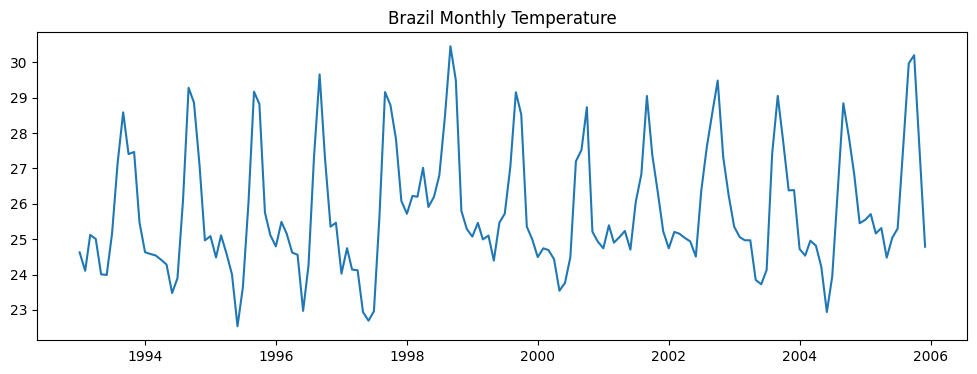

In [123]:
#skip header rows same as mexico
df = pd.read_csv("/content/brazil/temperature/POWER_Regional_Monthly_1993_2005.csv", skiprows=9)
df = df.drop(columns=["PARAMETER","ANN"])


#we reshape jan-dec into one column
df_melt = df.melt(
    id_vars=["YEAR", "LAT", "LON"],
    value_vars=[
        "JAN","FEB","MAR","APR","MAY","JUN",
        "JUL","AUG","SEP","OCT","NOV","DEC"
    ],
    var_name="Month",
    value_name="Temp"
)
print(df_melt.columns)

#convert month text to number
month_map = {
    "JAN":1,"FEB":2,"MAR":3,"APR":4,
    "MAY":5,"JUN":6,"JUL":7,"AUG":8,
    "SEP":9,"OCT":10,"NOV":11,"DEC":12
}

df_melt["Month"] = df_melt["Month"].map(month_map)


#create date column
df_melt["Date"] = pd.to_datetime(
    dict(
        year=df_melt["YEAR"],
        month=df_melt["Month"],
        day=1
    )
)

#we use day = 1 due to monthly resolution

#spatial averaging same as mexico
brazil_temp = (
    df_melt.groupby("Date")["Temp"]
    .mean()
    .reset_index()
)
print(df_melt.head(6))

plt.figure(figsize=(12,4))
plt.plot(brazil_temp["Date"], brazil_temp["Temp"])
plt.title("Brazil Monthly Temperature")
plt.show()



Index(['YEAR', 'LAT', 'LON', 'Month', 'Humidity'], dtype='object')
   YEAR   LAT     LON  Month  Humidity       Date
0  1993 -10.0 -46.250      1     78.08 1993-01-01
1  1993 -10.0 -46.875      1     77.56 1993-01-01
2  1993 -10.0 -47.500      1     78.34 1993-01-01
3  1993 -10.0 -48.125      1     78.98 1993-01-01
4  1993 -10.0 -48.750      1     79.56 1993-01-01
5  1993 -10.0 -49.375      1     81.12 1993-01-01


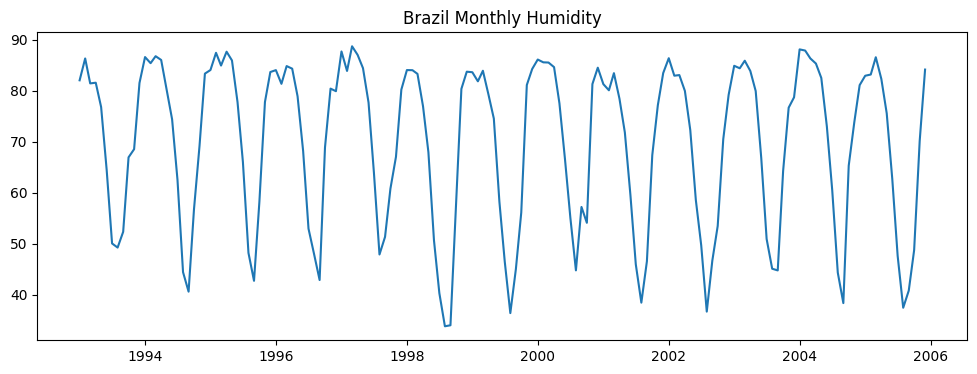

In [126]:
#skip header rows same as mexico
df = pd.read_csv("/content/brazil/humidity/POWER_Regional_Monthly_1993_2005.csv", skiprows=9)
df = df.drop(columns=["PARAMETER","ANN"])


#we reshape jan-dec into one column
df_melt = df.melt(
    id_vars=["YEAR", "LAT", "LON"],
    value_vars=[
        "JAN","FEB","MAR","APR","MAY","JUN",
        "JUL","AUG","SEP","OCT","NOV","DEC"
    ],
    var_name="Month",
    value_name="Humidity"
)
print(df_melt.columns)

#convert month text to number
month_map = {
    "JAN":1,"FEB":2,"MAR":3,"APR":4,
    "MAY":5,"JUN":6,"JUL":7,"AUG":8,
    "SEP":9,"OCT":10,"NOV":11,"DEC":12
}

df_melt["Month"] = df_melt["Month"].map(month_map)


#create date column
df_melt["Date"] = pd.to_datetime(
    dict(
        year=df_melt["YEAR"],
        month=df_melt["Month"],
        day=1
    )
)

#we use day = 1 due to monthly resolution

#spatial averaging same as mexico
brazil_humidity = (
    df_melt.groupby("Date")["Humidity"]
    .mean()
    .reset_index()
)
print(df_melt.head(6))

plt.figure(figsize=(12,4))
plt.plot(brazil_humidity["Date"], brazil_humidity["Humidity"])
plt.title("Brazil Monthly Humidity")
plt.show()


Index(['YEAR', 'LAT', 'LON', 'Month', 'Precipitation'], dtype='object')
   YEAR   LAT     LON  Month  Precipitation       Date
0  1993 -10.0 -46.250      1         164.28 1993-01-01
1  1993 -10.0 -46.875      1         184.96 1993-01-01
2  1993 -10.0 -47.500      1         179.78 1993-01-01
3  1993 -10.0 -48.125      1         137.80 1993-01-01
4  1993 -10.0 -48.750      1         139.03 1993-01-01
5  1993 -10.0 -49.375      1         143.30 1993-01-01


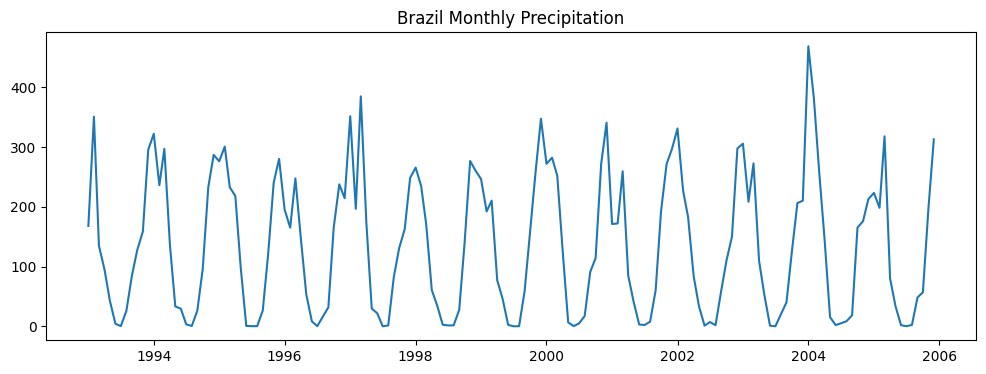

In [127]:
#skip header rows same as mexico
df = pd.read_csv("/content/brazil/precipitation/POWER_Regional_Monthly_1993_2005.csv", skiprows=9)

df = df.drop(columns=["PARAMETER","ANN"])


#we reshape jan-dec into one column
df_melt = df.melt(
    id_vars=["YEAR", "LAT", "LON"],
    value_vars=[
        "JAN","FEB","MAR","APR","MAY","JUN",
        "JUL","AUG","SEP","OCT","NOV","DEC"
    ],
    var_name="Month",
    value_name="Precipitation"
)
print(df_melt.columns)

#convert month text to number
month_map = {
    "JAN":1,"FEB":2,"MAR":3,"APR":4,
    "MAY":5,"JUN":6,"JUL":7,"AUG":8,
    "SEP":9,"OCT":10,"NOV":11,"DEC":12
}

df_melt["Month"] = df_melt["Month"].map(month_map)


#create date column
df_melt["Date"] = pd.to_datetime(
    dict(
        year=df_melt["YEAR"],
        month=df_melt["Month"],
        day=1
    )
)

#we use day = 1 due to monthly resolution

#spatial averaging same as mexico
brazil_prec = (
    df_melt.groupby("Date")["Precipitation"]
    .mean()
    .reset_index()
)
print(df_melt.head(6))

plt.figure(figsize=(12,4))
plt.plot(brazil_prec["Date"], brazil_prec["Precipitation"])
plt.title("Brazil Monthly Precipitation")
plt.show()


In [132]:
brazil_climate = (
    brazil_temp
    .merge(brazil_prec, on="Date")
    .merge(brazil_humidity, on="Date")
)

brazil_climate.head()
brazil_climate.tail()
len(brazil_climate)


156

In [136]:
#brazil dengue cases are only uptil april so we need to remove info for the rest of the year
brazil_climate = brazil_climate[
    (brazil_climate["Date"] >= "1993-01-01") &
    (brazil_climate["Date"] <= "2005-04-01")
]

# just checking if the final bounds are matching
print(
    brazil_nat["Date"].min(),
    brazil_nat["Date"].max()
)

print(
    brazil_climate["Date"].min(),
    brazil_climate["Date"].max()
)



1993-01-01 00:00:00 2005-04-01 00:00:00
1993-01-01 00:00:00 2005-04-01 00:00:00


## Align temporal resolution
after both climate and dengue cases have the same frequency we merge them together

In [142]:
print(mexico_nat["Date"].head())
print(mexico_weekly["Date"].head())


#merge incidence and climate
mexico_merged = (
    mexico_nat
    .merge(
        mexico_weekly,
        on="Date",
        how="inner" #we only want weeks where both exists, outer joins would create Nans. inner ensures algined time windows
    )
)

mexico_merged.head(6)
print(len(mexico_nat))
print(len(mexico_weekly))
print(len(mexico_merged))
mexico_merged.isna().sum() # should be 0




0   2002-12-29
1   2003-01-05
2   2003-01-12
3   2003-01-19
4   2003-01-26
Name: Date, dtype: datetime64[ns]
0   2002-12-29
1   2003-01-05
2   2003-01-12
3   2003-01-19
4   2003-01-26
Name: Date, dtype: datetime64[ns]
261
261
261


,0
Date,0
dengue_total,0
Temp,0
Rain,0
Humidity,0


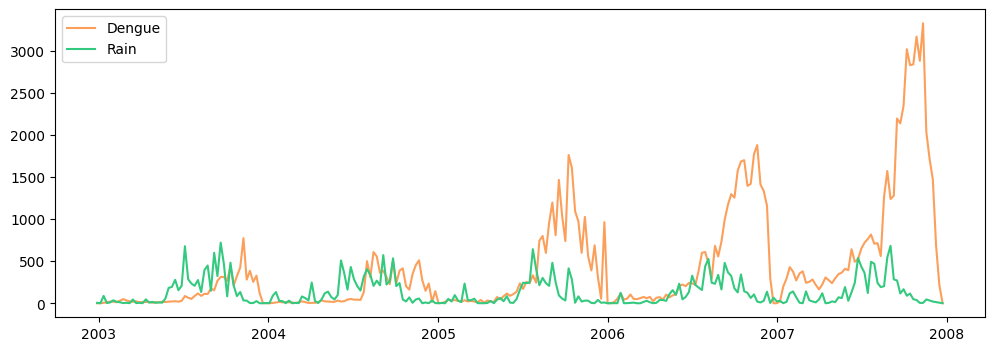

In [148]:

plt.figure(figsize=(12,4))
plt.plot(mexico_merged["Date"],
         mexico_merged["dengue_total"], color = "#FC9F5B",
         label="Dengue")

plt.plot(mexico_merged["Date"],
         10*mexico_merged["Rain"], color = "#33CA7F",
         label="Rain")

plt.legend()
plt.show()

#you notice how rain peeks precede outbreaks and there is seasonal co mevement


brazil merge

In [149]:
brazil_merged = brazil_nat.merge(
    brazil_climate,
    on="Date",
    how="inner"
)
